In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas

table = pandas.read_csv(Path() / "tables/dropouts.csv")

In [14]:
ious, cnts = {}, {}

for i, row in table.iterrows():
    if row['dropout'] // 0.05 not in ious:
        ious[row['dropout'] // 0.05] = 0
        cnts[row['dropout'] // 0.05] = 0

    ious[row['dropout'] // 0.05] += row['test_iou']
    cnts[row['dropout'] // 0.05] += 1

ious = list(map(lambda kv: (kv[0] * 0.05, kv[1]), sorted(map(lambda kv: (kv[0], kv[1] / cnts[kv[0]]), ious.items()), key=lambda kv: kv[0])))

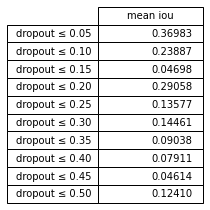

In [67]:
ious = np.array(ious)

labels, text = [], []
for i, val in ious:
    labels.append(f'dropout ≤ {i + 0.05:.2f}')
    text.append([f'{val:.5f}'])
    # print(f'≤ {i + 0.05:.2f}: {val:.5f}')

plt.figure(linewidth=2,
           tight_layout={'pad':1},
           figsize=(3,3)
          )

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)

table = ax.table(rowLabels=labels,
                 colLabels=["mean iou"],
                 cellText=text,
                 loc='center')
table.scale(1, 1.5)
plt.draw()
# fig = plt.gcf()
plt.show()

In [39]:
table = pandas.read_csv(Path() / "tables/last_iteration.csv")

In [40]:
stats = []
row_labels = []
col_labels = ['cutout_cnt', 'cutout_p', 'dropout', 'test_iou', 'test_loss', 'train_loss']

for i, row in table.iterrows():
    name = row["Name"]
    things = list(name.split('__'))
    name = things.pop()

    name = name.removeprefix("03_05/autoencoder/").removeprefix("autoencoder/")
    things.append(name)

    row_labels.append(', '.join(things))

    new_portion = [row["cutout_cnt"], row["cutout_p"], row["dropout"], row["test_iou"], row["test_loss"], row["train_loss"]]
    new_portion = list(map(lambda x: f'{x:.3f}', new_portion))

    stats.append(new_portion)

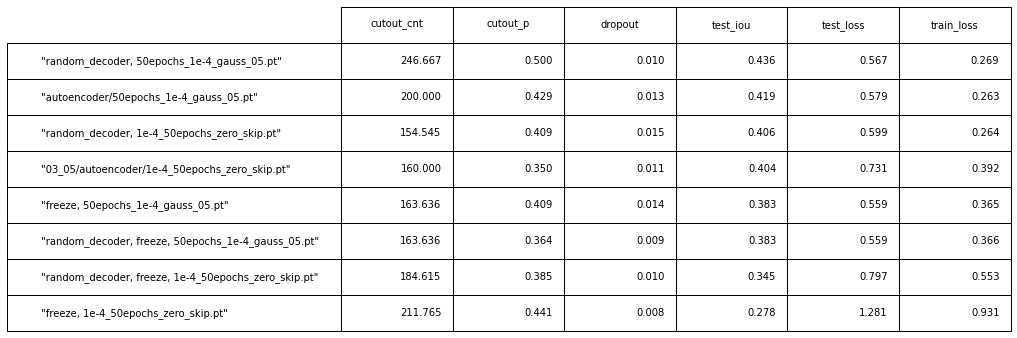

In [41]:
plt.figure(linewidth=2,
           # tight_layout={'pad':1},
           # figsize=(150,30)
          )

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)

table = ax.table(rowLabels=row_labels,
                 colLabels=col_labels,
                 cellText=stats,
                 loc='center')
table.scale(2, 3)
plt.draw()
# fig = plt.gcf()
plt.show()